* 486351 - Paulo Mateus Moura da Silva
* CCP9002 - Introdução à Modelagem
* Data: **04/04/2020**

# Tarefa 2 - Modelagem de doenças infecciosa

## Parte 1

Como todos devem estar sabendo, as atividades presenciais foram suspensas até uma nova avaliação. Por esse motivo, estou abrindo essa atividade remota, que destina-se em usar esse momento de contaminação para estudarmos mais sobre técnicas de modelagem matemática de doenças infecciosas.

Esse tipo de modelo é chamado SIR (_susceptible-infected-recovered_), isto é, (suscetível-infectado-recuperado) em tradução livre. Assim, quero que vocês estudem sobre esse assunto para entender o modelo matemático sugerido e as formas computacionais de resolvê-lo.

Logo, aguardo receber um relatório com explicações de cada parâmetro descrito no modelo e como ele representa o comportamento dessa infecção. Ademais, será bem avaliado o relatório que apresente também uma resolução computacional desse modelo com diferentes cenários.

Essa atividade estará aberta até 23h59 desse domingo, dia 22/03/2020. Vocês podem usar a ferramenta computacional que esteja mais a vontade, mas estarei disponibilizando um material com uma introdução de como usar a ferramenta SciLab, que é um programa gratuito.

Aproveito também para divulgar alguns links com alguns conceitos básicos sobre esse tipo de modelagem, mas não fiquem limitados somente a eles.

 * https://www.maa.org/press/periodicals/loci/joma/the-sir-model-for-spread-of-disease-introduction
 * http://www.modelinginfectiousdiseases.org/
 * https://en.wikipedia.org/wiki/Compartmental_models_in_epidemiology

Qualquer dúvida estou a disposição e aguardo o envio dos relatórios.

Atenciosamente,

Ricardo Coelho

## Parte 2

Fiquei muito contente dos relatórios enviados e espero que vocês tenham conseguido entender algumas técnicas matemáticas no intuito de realizar a modelagem de uma situação real.

Depois de analisar alguns relatórios que foram enviados, verifiquei que há trabalhos com um bom embasamento teórico sobre o modelo SIR e alguns fizeram boas análises diante dos experimentos computacionais realizados. Contudo, há relatórios muito superficiais, tanto do ponto de vista teórico como prático, sendo alguns relatórios superficiais em ambos os pontos. Assim, peço que alguns tentem se esforçar um pouco mais para fornecer um relatório consistente e detalhado, diante do que está sendo solicitado.

No intuito de fornecer uma nova oportunidade a todos, quero que vocês usem o trabalho já realizado por cada um e usem dados reais nesse momento para validar os modelos propostos. Esses dados reais dessa pandemia podem ser encontrados no link disponível abaixo. Vocês podem baixar um arquivo `*.XLSX` ou executar um script em Linguagem R.

* https://www.ecdc.europa.eu/en/publications-data/download-todays-data-geographic-distribution-covid-19-cases-worldwide

Diante desses dados reais, vocês podem também comparar o cenário brasileiro com o cenário de outros países e verificar se as medidas adotadas pelos governos (nacional, estaduais e municipais) estão tendo o efeito desejado.

Espero ter sido claro nessa atividade e estou a disposição para sanar alguma dúvida. Ademais, essa atividade é individual e estará disponível até às 23h59 do próximo domingo, dia 29/03/2020.

Aproveito para compartilhar com vocês alguns artigos que podem ajudar nas modelagens propostas por vocês, pois simulam o contágio em alguns cenários possíveis.

* https://www.washingtonpost.com/graphics/2020/world/corona-simulator/
* https://corona.katapult-magazin.de

Atenciosamente,

Ricardo Coelho

## Estrutura do trabalho

* 1. O Modelo SIR - Uma pequena introdução
* 2. Modelo SIR com mortalidade induzida por doença: Transmissão dependente da frequência
  * 2.1 Faça o questionamento
  * 2.2 Selecione a abordagem do modelo
  * 2.3 Formule o modelo
  * 2.4 Solucione o modelo
  * 2.5 Responda o questionamento
    * 2.5.1 Cenário 1 - Menor período de infectabilidade (7 dias) e taxa de mortalidade brasileira
    * 2.5.2 Cenário 2 - Alto período de infectabilidade (14 dias) e taxa de mortalidade mundial
    * 2.5.3 Cenário 3 - Grande período de infectabilidade e alta taxa de mortalidade
  * 2.6 Discussões e considerações finais
* Referências
* Anexo I. Validação com outros países
  * I.a Itália
  * I.b Espanha
  * I.c Estados Unidos da América


## 1. O Modelo SIR - Uma pequena introdução

O texto a seguir foi obtido e adaptado da [Wikipedia](https://pt.wikipedia.org/wiki/Modelo_epid\%C3\%AAmico#O_Modelo_SIR).

Em 1927, W. O. Kermack e A. G. McKendrick criaram um modelo em que se considera uma população fixa com apenas três compartimentos: $S$ - suscetível, $I$ - infectado, e, $R$ - removido. Os compartimentos utilizados para este modelo consistem em três classes:

 * $S(t)$ é usado para representar o número de indivíduos não infectados com a doença no momento $t$, ou aqueles suscetíveis à doença;
 * $I(t)$ representa o número de indivíduos no momento $t$ que tenham sido infectadas com a doença e que são capazes de transmitir a doença aos da categoria suscetível;
 * $R(t)$ é o compartimento utilizado para aqueles indivíduos que foram infectados e, em seguida, recuperados (removidos a partir da doença) no momento $t$. Os que estão nesta categoria não são capazes de ser infectados novamente ou para transmitir a infecção a outras pessoas.

O fluxo do presente modelo pode ser considerado da seguinte forma:

$$\text{Suscetíveis} \rightarrow \text{Infectados} \rightarrow \text{Recuperados}$$

Neste caso, é considerada uma população fixa, $N = S(t) + I(t) + R(t)$, de forma que não são consideradas mortes. Em tal situação temos derivadas das seguintes equações:

\begin{align*}
    \frac {dS}{dt} &= -\beta SI \\
    \frac {dI}{dt} &=  \beta SI-\gamma I \\
    \frac {dR}{dt} &=  \gamma I
\end{align*}


Neste modelo, temos também os parêmetros:
 * $\beta$ = taxa de transmissão. Incorpora a taxa de encontro entre indivíduos suscetíveis e infecciosos, juntamente com a probabilidade de transmissão;
 * $\gamma$ = taxa de remoção ou a taxa de recuperação, embora frequentemente estejamos mais interessados em sua recíproca (1/$\gamma$), que determina o período infeccioso médio.

Voltando-se ao sistema de equações, podemos detalhar seus termos:
 * $\beta SI$ descreve a interação entre as populações suscetíveis ($S$) e as infecciosas ($I$) reguladas pela taxa de transmissão ($\beta$):
   * na equação $\frac{dS}{dt}$ temos que a população de suscetíveis ($S$) diminui a medida que a interação com infectados ($I$) ocorre, e;
   * na equação $\frac{dI}{dt}$ temos que a população de infectados ($I$) aumenta a medida que a interação com suscentíveis ($S$) ocorre.
 * $\gamma I$ descreve a proporção da população de infectados ($I$) que torna-se recuperada ($R$) de acordo com a taxa de recuperação ($\gamma$), de forma que:
   * na equação $\frac{dI}{dt}$, a população de infectados ($I$) diminui, e;
   * na equação $\frac{dR}{dt}$, a população de recuperados ($R$) aumenta.

O modelo SIR é um dos modelos comportamentais mais simples, e diversos outros modelos derivam desta foram básica. Podemos citar
o [modelo SIR com nascimentos e mortes](http://homepages.warwick.ac.uk/~masfz/ModelingInfectiousDiseases/Chapter2/Program_2.2/index.html), 
o [modelo SIR com com mortalidade induzida por doença: transmissão dependente da densidade](http://homepages.warwick.ac.uk/~masfz/ModelingInfectiousDiseases/Chapter2/Program_2.3/index.html), o [modelo SIR com mortalidade induzida por doença: Transmissão dependente da frequência](http://homepages.warwick.ac.uk/~masfz/ModelingInfectiousDiseases/Chapter2/Program_2.4/index.html). Ainda, vale destacar outros modelos, como o [modelo SIS](http://homepages.warwick.ac.uk/~masfz/ModelingInfectiousDiseases/Chapter2/Program_2.5/index.html), em que alguém recuperado pode tornar-se novamente infectado, e o [modelo SEIR](http://homepages.warwick.ac.uk/~masfz/ModelingInfectiousDiseases/Chapter2/Program_2.6/index.html), onde existe o estágio $E$ - exposto, que corresponde alguém infectado mas que ainda não tornou-se infeccioso.

Nas simulações feitas abaixo, foi aplicado o "[Modelo SIR com mortalidade induzida por doença: Transmissão dependente da frequência](http://homepages.warwick.ac.uk/~masfz/ModelingInfectiousDiseases/Chapter2/Program_2.4/index.html)" com um ajuste para corrigir a taxa de crescimento, dado a hipótese considerada para esta taxa.


## 2. Modelo SIR com mortalidade induzida por doença: Transmissão dependente da frequência

Texto e modelagem baseados em: http://homepages.warwick.ac.uk/~masfz/ModelingInfectiousDiseases/Chapter2/Program_2.4/index.html

Inúmeras doenças infecciosas estão associadas a um risco substancial de mortalidade, incluindo o COVID-19, a doença causada pelo SARS-COV-2 . Como exploramos as consequências da mortalidade induzida por infecção?

Especificamente, como incorporamos uma probabilidade de mortalidade nas equações de SIR? A abordagem óbvia seria adicionar um termo como $-m I(t)$ à equação básica, em que $m$ é uma taxa de mortalidade induzida por doença per capita para indivíduos infectados. No entanto, isso pode ser difícil de interpretar biologicamente ou estimar a partir dos dados.

Em vez disso, é preferível pensar na probabilidade, $\rho$, de um indivíduo da classe $I$ morrer pela infecção antes de se recuperar ou morrer de causas naturais, isto é, um indivído morrer sem ser pela doença modelada.
Inicialmente, consideramos o caso da transmissão dependente da frequência (**frequency-dependent**), em que quando o tamanho total da população $P$ diminui, devido à mortalidade induzida pela doença, há uma interação reduzida entre os hospedeiros. Para tornar a dinâmica mais clara, passamos a considerar o número ou a densidade (e não a proporção) de indivíduos.


### 2.1 Faça o questionamento

**Problema**: SARS-COV-2, uma nova cepa do _Corona vírus_ muito contagioso apareceu no mundo. O vírus, no qual o paciente zero provavelmente surgio na China, está se espalhando no mundo e matando rapidamente.

**Questionamento**: Qual seria o momento de pico de contaminação aqui no Brasil? Modele a expansão dessa pandemia.

**Variáveis**:

 * $t$ = unidade de tempo (em dia);


 * $\rho$ = probabilidade de motalidade: probabilidade de um indivíduo infectado falecer da doença antes de se recuperar;
 * $\mu$ = taxa de morte per capta por causas naturais, i.e., sem ser pela doença;
 * $\upsilon$ = taxa de nascimento populacional;
 * $\beta$ = taxa de transmissão. Incorpora a taxa de encontro entre indivíduos suscetíveis e infecciosos, juntamente com a probabilidade de transmissão;
 * $\gamma$ = taxa de remoção ou a taxa de recuperação, embora frequentemente é do interesse a sua recíproca (1/$\gamma$), que determina o período infeccioso médio;


 * $X(t)$ = número ou densidade de indivíduos suscetíveis no tempo $t$;
 * $Y(t)$ = número ou densidade de indivíduos infecciosos no tempo $t$;
 * $Z(t)$ = número ou densidade de indivíduos recuperados no tempo $t$;
 * $P(t)$ = tamanho da população no tempo $t$;


 * $X(0)$ = número inicial ou a densidade de indivíduos suscetíveis;
 * $Y(0)$ = número inicial ou a densidade de indivíduos infecciosos;
 * $Z(0)$ = número inicial ou a densidade de indivíduos recuperados;
 * $P(0)$ = $X(0) + Y(0) + Z(0)$ = tamanho inicial da população.


**Hipóteses (_assumptions_):**

 * $P(0)$ = $204.450.649$, [segundo IBGE (2015)](https://agenciabrasil.ebc.com.br/internacional/noticia/2015-08/populacao-brasileira-supera-os-204-milhoes);
 * $Y(0)$ = $1$. Consideramos que somente um infectado veio de outro país para o Brasil  
 * $X(0)$ = $P(0) - Y(0) = 204.450.649 - 1 = 204.450.648$, pois é um vírus novo, ao contrário da gripe, por exemplo;
 * $Z(0)$ = $0$;


 * $\rho$ = Definido nas simulações;
 * $\mu$ = $\frac{6,08}{1000}$ ao ano = $\frac{6,08}{1000 * 365}$ ao dia, [segundo IBGE (2015)](https://brasilemsintese.ibge.gov.br/populacao/taxas-brutas-de-mortalidade.html);
 * $\upsilon$ = $\frac{14,16}{1000}$ ao ano = $\frac{14,16}{1000 * 365}$ ao dia, [segundo IBGE (2015)](https://brasilemsintese.ibge.gov.br/populacao/taxas-brutas-de-natalidade.html);
 * $\beta$ = Definido nas simulações;
 * $\gamma$ = Definido nas simulações.

**Objetivo:** Encontrar o $t$ em $I(t)$ atinge o maior valor.

### 2.2 Selecione a abordagem do modelo

A abordagem selecionada para a resolução do problema é a resolução do sistema SIR.


### 2.3 Formule o modelo

Tendo em consideração que o modelo foi construído enviesado ao sistema SIR, podemos já utilizar as equações:

\begin{align*}
    \frac{dX}{dt} &= \upsilon P - \frac{\beta XY}{P} - \mu X \\
    \frac{dY}{dt} &= \frac{\beta XY}{P} - \frac{\gamma+\mu}{1-\rho} Y \\
    \frac{dZ}{dt} &= \gamma Y - \mu Z
\end{align*}


Podemos destacar desse sistema de equações:
 * Em $\frac{dX}{dt}$, o termo $\upsilon P$ relaciona a taxa de natalidade ($\upsilon$) com toda a população ($P$). Note que pressupõe-se que não há um risco maior a contaminação de bebês nascidos de mães doentes ([o que não é verdade](https://noticias.uol.com.br/ultimas-noticias/afp/2020/03/26/estudo-aponta-que-transmissao-de-coronavirus-durante-a-gravidez-e-raro-mas-possivel.htm)) e nem que crianças nascidas de mães recuperadas são automaticamente imunes (não foi encontrado dados sobre essa possibilidade);
   * **Observação**: Na modelagem proposta pelo livro, $\upsilon$ aparece sozinho. Mas da forma com este foi definida (ver hiopóteses), ela não tem relação com a população. Desta forma, foi adicionado o fator multiplicativo, ficando $\upsilon P$.
 * As três populações sofrem uma perda proporcional envolvendo a taxa de mortalidade natural ($\mu$), i.e., a que não é causada pela doença.

### 2.4 Solucione o modelo

O modelo foi executado iterativamente. Abaixo o código da simulação.


In [1]:
import scipy.integrate as spi
import numpy as np
import pylab as pl

from src.utils import rmse

In [2]:
import src.dataset as dataset
dataset.dataset('Brazil').head(2)

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,date,cum_cases,cum_deaths
1168,26/02/2020,26,2,2020,1,0,Brazil,BR,BRA,209469333.0,2020-02-26,1,0
1167,27/02/2020,27,2,2020,0,0,Brazil,BR,BRA,209469333.0,2020-02-27,1,0


In [3]:
from src.relatorio import Relatorio
from src.parametros import Parametros


class Simulacao:
    def __init__(self, parametros):
        self.parametros = parametros
        
    def equacoes_diferenciais(self):
        β = self.parametros.β
        γ = self.parametros.γ
        ρ = self.parametros.ρ

        υ = self.parametros.υ
        μ = self.parametros.μ

        def diff_eqs(passo_anterior, t):
            X, Y, Z, D = passo_anterior

            P = sum((X, Y, Z))

            X_next = υ*P - β*X*Y/P - μ*X
            Y_next = β*X*Y/P - (γ+μ)/(1-ρ) * Y
            Z_next = γ*Y - μ*Z
            
            D_next = ((γ+μ)/(1-ρ) - γ+μ) * Y
            
            return np.array([X_next, Y_next, Z_next, D_next])

        return diff_eqs

    def simular(self):
        P_0 = self.parametros.P_0

        Y_0 = self.parametros.Y_0
        X_0 = P_0 - Y_0
        Z_0 = P_0 - X_0 - Y_0

        D_0 = 0 # Número de mortes
        
        INPUT = (X_0, Y_0, Z_0, D_0)

        tempo_step = self.parametros.tempo_step
        numero_dias = self.parametros.numero_dias

        t_inicio = 0.0; t_fim = numero_dias; t_incremento = tempo_step
        t_intervalo = np.arange(t_inicio, t_fim + t_incremento, t_incremento)

        resultado = spi.odeint(self.equacoes_diferenciais(), INPUT, t_intervalo)

        return Relatorio(self.parametros, resultado)

### 2.5 Responda o questionamento

Na modelagem definida, foi considerado o processo de transmissão somente localizado, sem a importação de novos casos, com excessão do primeiro caso.

Em todos os casos, foram obtidas informações da população brasileira disponibilizadas pelo Instituto Brasileiro de Geografia e Estatistica - IBGE para o ano de 2015. Os outros parâmetros são 
* **taxa de recuperação** (ou 1 sobre período infeccioso médio);
* **probabilidade de falecimento**;
* **taxa de transmissão** de indivíduos suscetíveis a adoecerem e individos infecciosos;

Dentre as considerações para os casos de teste, pode-se numerar:

* **Taxa de recuperação**:
  1. No modelo SIR utilizado, duranto todo o período que uma pessoa encontra-se no grupo $I$ (i.e., está infectada), ela transmite a doença;
  1. [Os sintomas aparecem e se desenvolvem entre 3 e 25 dias](https://g1.globo.com/bemestar/coronavirus/noticia/2020/03/21/covid-19-gripe-resfriado-e-alergias-tem-sintomas-parecidos-mas-duracao-e-evolucao-sao-diferentes.ghtml);
  1. Foi considerado os seguintes tempo médio de infectabilidade: 7, 14 e 25 dias.


* **Probabilidade de falecimento**
  1. A taxa de fatalidade atualmente média no mundo está em 4.56%, segundo [os dados disponibilizados pela European Centre for Disease Prevention and Control](https://www.ecdc.europa.eu/en/publications-data/download-todays-data-geographic-distribution-covid-19-cases-worldwide);
  1. A taxa de fatalidade atualmente no Brasil está em 2.69%, segundo [os dados disponibilizados pela European Centre for Disease Prevention and Control](https://www.ecdc.europa.eu/en/publications-data/download-todays-data-geographic-distribution-covid-19-cases-worldwide);
  1. Um cenário pessimista, a taxa de fatalidade estaria em [14%, que é a taxa de mortalidade de pessoas acima dos 80 anos](https://tvbrasil.ebc.com.br/reporter-brasil/2020/03/14-dos-casos-de-covid-19-em-idosos-resultaram-em-morte-diz-estudo). Em um dos casos de comparação, foi utilizada uma taxa menos pessimista de 7%.


* **Taxa de transmissão**:
  1. Dada que a taxa de transmissão depende das ações tomadas ou não pelos governos e a população, esta taxa foi ajustada manualmente para se enquadrar com a curva real de infectados.

Dito isso, foram testados três cenários:

In [4]:
mortalidade_mundo = dataset.mortalidade(dataset.all())
print(f'Mortalidade atual no mundo: {mortalidade_mundo*100:.2f}%')

Mortalidade atual no mundo: 5.37%


#### 2.5.1 Cenário 1 - Menor período de infectabilidade (7 dias) e taxa de mortalidade brasileira

Neste cenário, o pico da infecção ocorre com um valor entre um terço e um quarto da população contaminada simultaneamente com SARS-COV-19. O pico de infectados simultâneos ocorre em 11/05/2020.

Apesar da taxa de fatalidade ser menor que a média mundial, é necessário ponderar dois fatos:
1. Estamos ainda no começo da infecção, com quase um mês e meior corrido. Não está claro qual a força do vírus no país;
1. Somente após o dia 22/03 que começaram  esforços para testes além dos doentes em situação crítica. Desta forma, devem haver mais infectados que a quantidade detectada por testes;
1. Existe a possibilidade de que esteja havendo uma [grande subnotificação de casos](https://www1.folha.uol.com.br/equilibrioesaude/2020/04/estados-e-municipios-no-pais-relatam-subnotificacao-gigantesca-de-casos.shtml).

Abaixo do código, maiores detalhes sobre os parâmetros, datas importantes, tamanho da população e mortes, raiz do erro médio quadrático computado em comparação com os dados obtidos até então e, por fim, gráficos apresentando os resultados da simulação.

 País: Brazil

Parâmetros
-------------------------------
 - υ: Taxa de natalidade: 3.8794520547945204e-05
 - μ: Taxa de mortalidade (por mortes naturais): 1.6657534246575344e-05

 - γ: Taxa de recuperação: 0.14285714285714285
   -> 1/γ: Período infeccioso médio: 7.0 dias
 - ρ: Probabilidade de falecimento: 3.96%
 - β: Taxa de transmissão: 0.410958904109589

Datas
-------------------------------
26/02/2020 - Data de identificação do primeiro infectado
11/05/2020 - Dia de pico de infectados (75º dia de contágio)

População
-------------------------------
População inicial:   204.450.649 habitantes (100%)
População em um ano: 198.537.667 habitantes (97.11%)
 - Diferença na população em um ano: 5.912.982 de habitantes a menos
 - População morta pelo SARS-COV-2 em um ano: 7.566.369 habitantes


Comparação com o cenário atual
-------------------------------
RMSE:  864.4967767352468


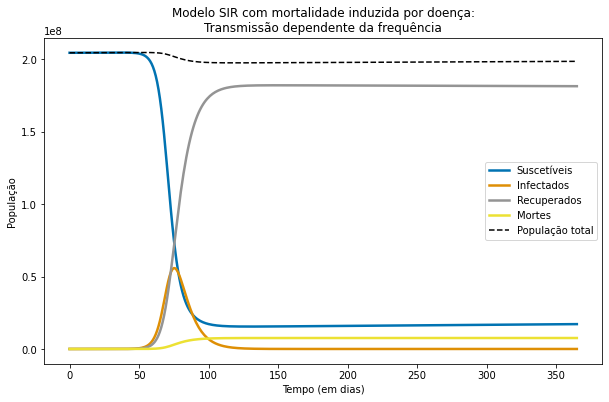

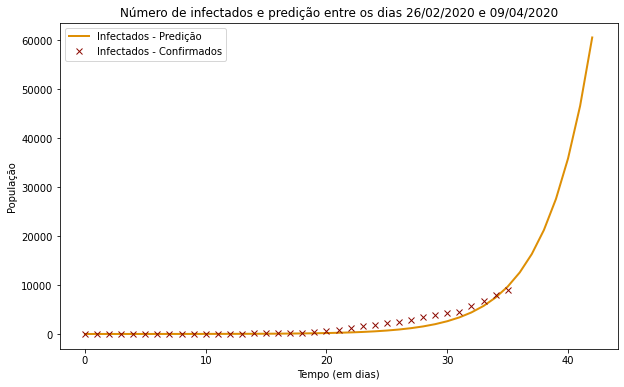

In [5]:
params = Parametros(
    pais= 'Brazil',
    μ = 6.08/(1000 * 365), υ = 14.16/(1000 * 365),
    β=150/365, γ=1/7, ρ=dataset.mortalidade(dataset.dataset('Brazil')),
    P_0 = 204_450_649, Y_0 = 1
)

brasil = Simulacao(params)

relatorio = brasil.simular()
relatorio.relatorio()
relatorio.plot()

#### 2.5.2 Cenário 2 - Alto período de infectabilidade (14 dias) e taxa de mortalidade mundial

Neste cenário, ocorre um pico com um valor próximo da metade da população simultaneamente com SARS-COV-19. O pico de infectados simultâneos ocorre em 15/05/2020. Neste cenário, mais pessimista que o anterior traz 3.422.150 mortes a mais pelo virus.

Abaixo do código, maiores detalhes sobre os parâmetros, datas importantes, tamanho da população e mortes, raiz do erro médio quadrático computado em comparação com os dados obtidos até então e, por fim, gráficos apresentando os resultados da simulação.

 País: Brazil

Parâmetros
-------------------------------
 - υ: Taxa de natalidade: 3.8794520547945204e-05
 - μ: Taxa de mortalidade (por mortes naturais): 1.6657534246575344e-05

 - γ: Taxa de recuperação: 0.07142857142857142
   -> 1/γ: Período infeccioso médio: 14.0 dias
 - ρ: Probabilidade de falecimento: 5.37%
 - β: Taxa de transmissão: 0.336986301369863

Datas
-------------------------------
26/02/2020 - Data de identificação do primeiro infectado
15/05/2020 - Dia de pico de infectados (79º dia de contágio)

População
-------------------------------
População inicial:   204.450.649 habitantes (100%)
População em um ano: 195.142.912 habitantes (95.45%)
 - Diferença na população em um ano: 9.307.737 de habitantes a menos
 - População morta pelo SARS-COV-2 em um ano: 10.988.519 habitantes


Comparação com o cenário atual
-------------------------------
RMSE:  886.6124739283905


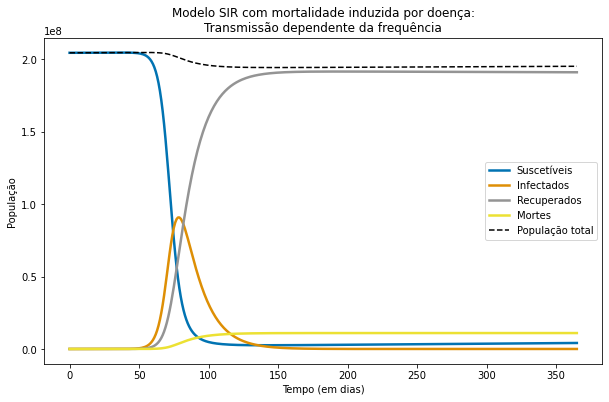

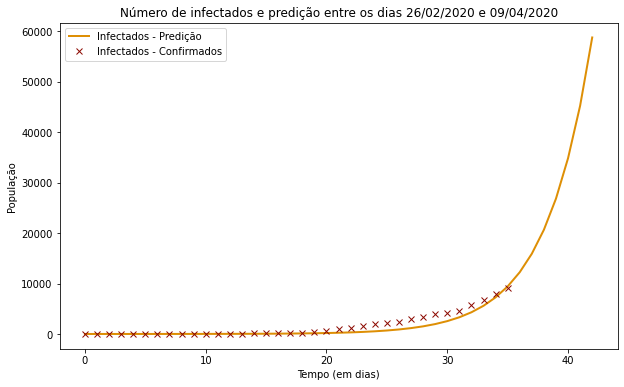

In [6]:
params = Parametros(
    pais='Brazil',
    μ = 6.08/(1000 * 365), υ = 14.16/(1000 * 365),
    β=123/365, γ=1/14., ρ=mortalidade_mundo,
    P_0 = 204_450_649, Y_0 = 1
)

brasil = Simulacao(params)

relatorio = brasil.simular()
relatorio.relatorio()
relatorio.plot()

#### 2.5.3 Cenário 3 - Grande período de infectabilidade e alta taxa de mortalidade

Neste cenário, chegamos em um pico com próximo 65% da população simultaneamente com SARS-COV-19. O pico de infectados simultâneos ocorre 17/05/2020.
Aqui, o cenário ainda mais pessimista traz uma diminuição de 6,25% da população brasileira em até um ano após o primeiro caso de contaminação.

Abaixo do código, maiores detalhes sobre os parâmetros, datas importantes, tamanho da população e mortes, raiz do erro médio quadrático computado em comparação com os dados obtidos até então e, por fim, gráficos apresentando os resultados da simulação.

 País: Brazil

Parâmetros
-------------------------------
 - υ: Taxa de natalidade: 3.8794520547945204e-05
 - μ: Taxa de mortalidade (por mortes naturais): 1.6657534246575344e-05

 - γ: Taxa de recuperação: 0.04
   -> 1/γ: Período infeccioso médio: 25.0 dias
 - ρ: Probabilidade de falecimento: 7.00%
 - β: Taxa de transmissão: 0.3041095890410959

Datas
-------------------------------
26/02/2020 - Data de identificação do primeiro infectado
17/05/2020 - Dia de pico de infectados (81º dia de contágio)

População
-------------------------------
População inicial:   204.450.649 habitantes (100%)
População em um ano: 191.665.282 habitantes (93.75%)
 - Diferença na população em um ano: 12.785.367 de habitantes a menos
 - População morta pelo SARS-COV-2 em um ano: 14.517.324 habitantes


Comparação com o cenário atual
-------------------------------
RMSE:  900.536560620256


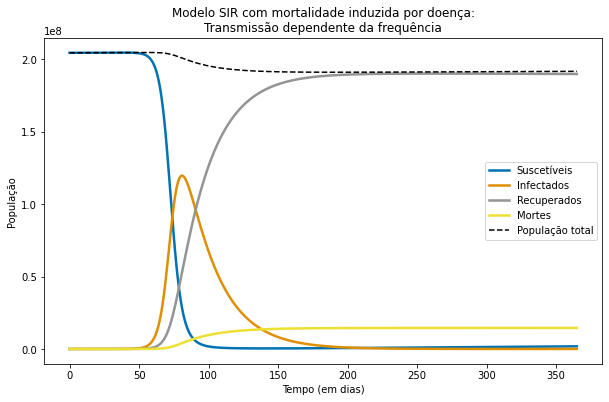

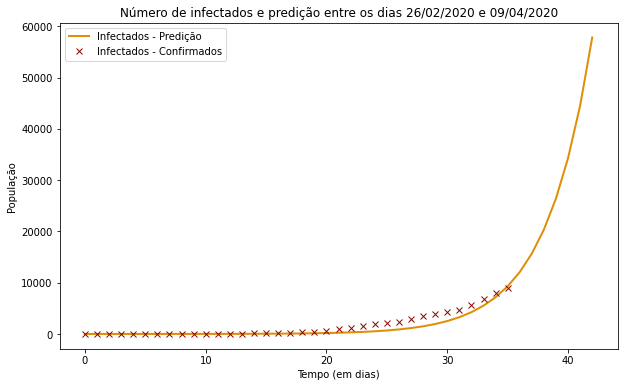

In [7]:
params = Parametros(
    pais= 'Brazil',
    μ = 6.08/(1000 * 365), υ = 14.16/(1000 * 365),
    β=111/365, γ=1/25., ρ=7/100,
    P_0 = 204_450_649, Y_0 = 1
)

brasil = Simulacao(params)

relatorio = brasil.simular()
relatorio.relatorio()
relatorio.plot()

### 2.6 Discussões e considerações finais

Foram realizadas três simulações para o Brasil, utilizando dados demográficos de 2015 obtidos a partir do IBGE. O primeiro cenário com um período de infectabilidade de 7 dias e com a taxa de mortalidade brasileira de 3,96%, considerando o dia 04/04/2020. O segundo com um período de infectabilidade de 14 dias e taxa de mortalidade mundial de 5,37%, considerando o dia 04/04/2020. O terceiro com um período de infectabilidade de 25 dias e uma taxa de mortalidade de 7,00%.

Em todos os centários, a definição da taxa de transmissão do vírus foi feita por um processo de busca manual da taxa cujo RMSE (_root-mean-square error_ ou _raiz do erro médio quadrático_) apresentasse o menor valor. A função RMSE é dada por
\begin{align}
\text{RMSE}(\mathbf{\hat{y}}, \mathbf{y}) = \sqrt{\frac{\sum_{t=1}^{T}(\hat{y}_{t} - y_{t})^2}{T}},
\end{align}
onde o vetor $\mathbf{\hat{y}}$ corresponde aos valores estimados do número de infectados por dia pelo modelo e o vetor $\mathbf{y}$ corresponde os números oficiais de infectados por dia.
É importante pontuar que o número alto do RMSE indicado pelos experimentos se dá pelo resultado da função possui a mesma dimensão dos dados de entrada. Foi considerado utilizar a média das variações de casos a cada dia, entretanto esta medida apresentou resultados mais distantes dos dados reaís para o cenário brasileiro.

Em todos os cenários, o vírus se espalha rapidamente no país de forma que o pico da panedemia chega entre 75º dia e o 81° dia. Nos cenários, em um ano desde o primeiro contágio, há uma redução populacional entre 5,9 milhões e 12,8 milhões. No segundo e no terceiro cenário, praticamente toda a população entre em contato com o vírus.

Nota-se nos gráficos que comparam o número real de infectados com o número predito de infectados que a predição não acompanha com fidelidade os casos reais. Dentre as hipóteses, podemos considerar o resultado das ações de mitigação tomadas pelos governos (nacional, estaduais e municipais), uma inadequação do modelo ou dados não consistentes com a realidade, incluindo a falta de testes em massa na população para a doença e uma possível subnotificação de casos.

Em todos os cenários, nota-se uma situação bem mais pessimista do que o recentemente estipulado no artigo [The Global Impact of COVID-19 and Strategies for Mitigation and Suppression](https://www.imperial.ac.uk/media/imperial-college/medicine/sph/ide/gida-fellowships/Imperial-College-COVID19-Global-Impact-26-03-2020.pdf) do _Imperial College COVID-19 Response Team_ para o Brasil. Destacando o pior e o melhor cenário: 

* Cenário 1 – Sem medidas de mitigação:
  - População total: 212.559.409
  - População infectada: 187.799.806
  - Mortes: 1.152.283
  - Indivíduos necessitando hospitalização: 6.206.514
  - Indivíduos necessitando UTI: 1.527.536
* Cenário 5 – Com supressão precoce:
  - População total: 212.559.409
  - População infectada: 11.457.197
  - Mortes: 44.212
  - Indivíduos necessitando hospitalização: 250.182
  - Indivíduos necessitando UTI: 57.423
  - Demanda por hospitalização no pico da pandemia: 72.398
  - Demanda por leitos de UTI no pico da pandemia: 15.432

Nos esforços tomados neste trabalho, não foi obtido êxito na diminuição da explosão de infectados, de forma que ainda respeitasse os valores correspondentes aos dados reais para o Brasil. Assim, consequentemente, o número de mortes apresentou-se bem mais elevado do que as simulações de referência.

O Anexo I apresenta uma simulação para outros três países: Itália (Anexo I.a), Espanha (Anexo I.b) e Estados Unidos da América (Anexo I.c). Nestas simulações, foram considerados os parâmetros correspondentes ao primeiro experimento do país: um período de infectabilidade de 7 dias e uma taxa de mortalidade para cada país, considerando o dia 04/04/2020. Nota-se em todos os casos que o pico se dá com um tempo maior que os simulados para o Brasil e com uma proporção de infectados em relação a população menor que no Brasil. Na Itália, nota-se que o modelo não corresponde com a realidade. Entretanto, tanto na Espanha quanto nos EUA, a simulação apresenta um comportamente bastante similar aos dados reais de infectados da base de dados utilizada.

Como trabalhos futuros, recomendo um estudo d[o artigo citado acima](https://www.imperial.ac.uk/media/imperial-college/medicine/sph/ide/gida-fellowships/Imperial-College-COVID19-Global-Impact-26-03-2020.pdf). Recomendo também considerar uma nova simulação com o modelo SEIR (susceptible-exposed-infected-resistant). Ainda, recomendo a leitura e experimentação do [Epidemic Calculator](http://gabgoh.github.io/COVID/index.html), uma ferramenta online com suporte a uma série de parêmetros para simulação, incluindo estratégias de mitigação.

## Referências

* European Centre for Disease Prevention and Control. **Download today’s data on the geographic distribution of COVID-19 cases worldwide**: https://www.ecdc.europa.eu/en/publications-data/download-todays-data-geographic-distribution-covid-19-cases-worldwide
* WIKIPEDIA. **Modelo epidêmico - O Modelo SIR**: https://pt.wikipedia.org/wiki/Modelo_epid%C3%AAmico#O_Modelo_SIR
* KEELING, Matt J.; ROHANI, Pejman. **Modeling infectious diseases in humans and animals**. Princeton University Press, 2011.
  * Material suplementar: http://homepages.warwick.ac.uk/~masfz/ModelingInfectiousDiseases/index.html
* WALKER, Patrick GT et al. **The Global Impact of COVID-19 and Strategies for Mitigation and Suppression. On behalf of the imperial college covid-19 response team, Imperial College of London**, 2020.
  * Disponível em https://www.imperial.ac.uk/media/imperial-college/medicine/sph/ide/gida-fellowships/Imperial-College-COVID19-Global-Impact-26-03-2020.pdf
* IBGE. **Brasil em síntese**: https://brasilemsintese.ibge.gov.br/populacao.html
* Agencia Brasil - EBC. **População brasileira supera os 204 milhões**: https://agenciabrasil.ebc.com.br/internacional/noticia/2015-08/populacao-brasileira-supera-os-204-milhoes
* CANZIAN, Fernando. **Estados e municípios no país relatam subnotificação gigantesca de casos** in Folha de São Paulo: https://www1.folha.uol.com.br/equilibrioesaude/2020/04/estados-e-municipios-no-pais-relatam-subnotificacao-gigantesca-de-casos.shtml
* MACROTRENDS. **Global comparative data**. https://www.macrotrends.net/countries/topic-overview 
  * Taxas de natalidade e mortalidade de países
* INDEX MUNDI. **Polulação**: https://www.indexmundi.com/
* GAMIO, Lazaro; CAI, Weiyi and HASSAN, Adeel. **Where the U.S. Stands Now on Coronavirus Testing** in The New Work Times: https://www.nytimes.com/interactive/2020/03/26/us/coronavirus-testing-states.html
* MC_KINLEY, Jesse. **New York City Region Is Now an Epicenter of the Coronavirus Pandemic** in The New Work Times: https://www.nytimes.com/2020/03/22/nyregion/Coronavirus-new-York-epicenter.html

## Anexo I. Validação com outros países

Simulações para países selecionados. Em todos os casos, foi considerada a taxa de mortalidade registrada até então para o país e o período de infectabilidade (1/$\gamma$) de 7 dias.

Comparado com a versão anterior do trabalho (versão do dia 29/03/2020), a taxa de transmissão ($\beta$) foi corrigida, de forma que se ajustasse a atual realidade. Para a maioria dos experimentos, foi necessário uma diminuição de $\beta$, com excessão da modelagem para Espanha e para Estados Unidos da América, em que a taxa permaneceu a mesma.

### I.a Itália

Referência de valores utilizados:
 * Taxa de natalidade utilizada: https://www.indexmundi.com/pt/italia/taxa_de_nascimento.html
 * Taxa de mortalidade utilizada: https://www.indexmundi.com/pt/italia/taxa_de_mortalidade.html
 * Tamanho da população: https://www.indexmundi.com/pt/italia/populacao.html

É importante notar que na Itália, a taxa de mortalidade encontra-se em 12.25%. Com isto, apesar de um pico de infectados ser proporcionalmente bem menor que no Brasil, a modelagem prevê um número significativo de habitantes a menos depois de um ano após o primeiro infectado: 6.448.274 de habitantes a menos, pedendo então 10,40% de sua população.

Contudo, vale ressaltar que nesse país foram tomadas medidas de mitigação, de forma que fica explícito no segundo gráfico uma diferença de crescimento entre os infectados preditos e os oficialmente computados. Apesar da taxa de transmissão ($\beta$) ter sido ajustada, este modelo não conseguiu representar adequadamente a atual situação da Itália.

 País: Italy

Parâmetros
-------------------------------
 - υ: Taxa de natalidade: 2.747945205479452e-05
 - μ: Taxa de mortalidade (por mortes naturais): 2.3835616438356162e-05

 - γ: Taxa de recuperação: 0.14285714285714285
   -> 1/γ: Período infeccioso médio: 7.0 dias
 - ρ: Probabilidade de falecimento: 12.25%
 - β: Taxa de transmissão: 0.3506849315068493

Datas
-------------------------------
31/01/2020 - Data de identificação do primeiro infectado
06/05/2020 - Dia de pico de infectados (96º dia de contágio)

População
-------------------------------
População inicial:   62.007.540 habitantes (100%)
População em um ano: 55.559.266 habitantes (89.60%)
 - Diferença na população em um ano: 6.448.274 de habitantes a menos
 - População morta pelo SARS-COV-2 em um ano: 6.540.065 habitantes


Comparação com o cenário atual
-------------------------------
RMSE:  19090.841508582154


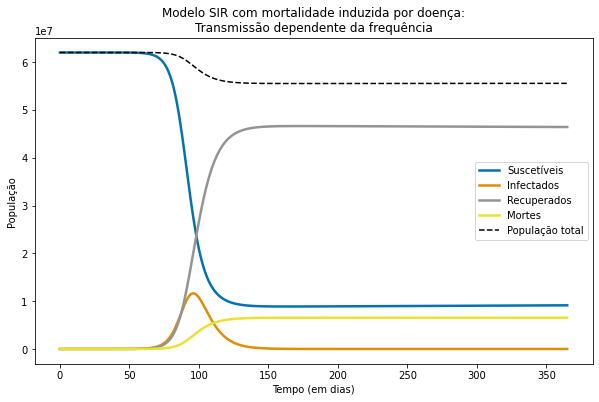

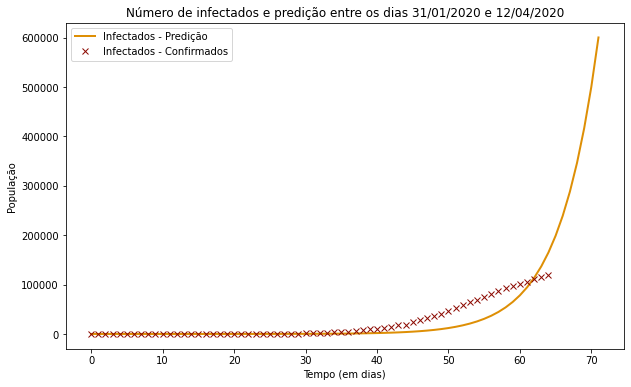

In [8]:
params = Parametros(
    pais= 'Italy',

    μ = 8.7/(1000 * 365), υ = 10.03/(1000 * 365),
    
    β=128/365, γ=1/7., ρ=dataset.mortalidade(dataset.dataset('Italy')),
    
    P_0 = 62_007_540,  # 
    Y_0 = 1
)

simulacao = Simulacao(params)

relatorio = simulacao.simular()
relatorio.relatorio()
relatorio.plot()

### I.b Espanha

Referência de valores utilizados:
 * Taxa de natalidade utilizada: https://www.macrotrends.net/countries/ESP/spain/birth-rate
 * Taxa de mortalidade utilizada: https://www.macrotrends.net/countries/ESP/spain/death-rate
 * Tamanho da população: https://www.macrotrends.net/countries/ESP/spain/population

No segundo gráfico, nota-se que a quantidade de infectados oficialmente computados apresenta um crescimento exponencial. Desta forma, pressupõe-se que medidas de contenção por mitigação ainda não tiveram impacto no crescimento. Na simulação atual, a taxa de falecimento de 9.29% do país encontra-se maior que a média mundial. Neste país, a modelagem estima uma redução da população em 7,11% após um ano da detecção do primeiro infectado. Nota-se ainda um número de infectados no pico de infecção proporcionalmente menor que nos casos simulados para o Brasil.

 País: Spain

Parâmetros
-------------------------------
 - υ: Taxa de natalidade: 2.264383561643836e-05
 - μ: Taxa de mortalidade (por mortes naturais): 2.5241095890410956e-05

 - γ: Taxa de recuperação: 0.14285714285714285
   -> 1/γ: Período infeccioso médio: 7.0 dias
 - ρ: Probabilidade de falecimento: 9.29%
 - β: Taxa de transmissão: 0.283013698630137

Datas
-------------------------------
02/01/2020 - Data de identificação do primeiro infectado
18/05/2020 - Dia de pico de infectados (137º dia de contágio)

População
-------------------------------
População inicial:   46.754.778 habitantes (100%)
População em um ano: 43.432.495 habitantes (92.89%)
 - Diferença na população em um ano: 3.322.283 de habitantes a menos
 - População morta pelo SARS-COV-2 em um ano: 3.291.206 habitantes


Comparação com o cenário atual
-------------------------------
RMSE:  4631.5113599772285


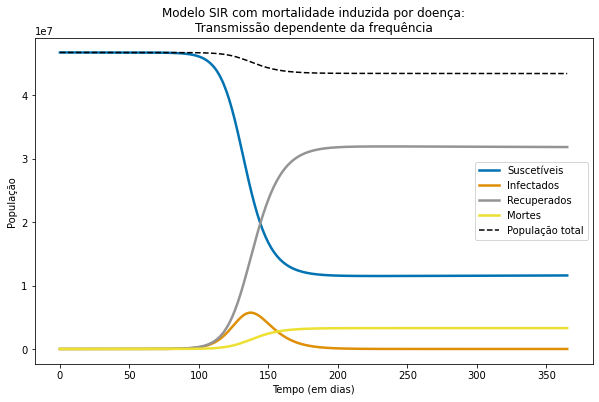

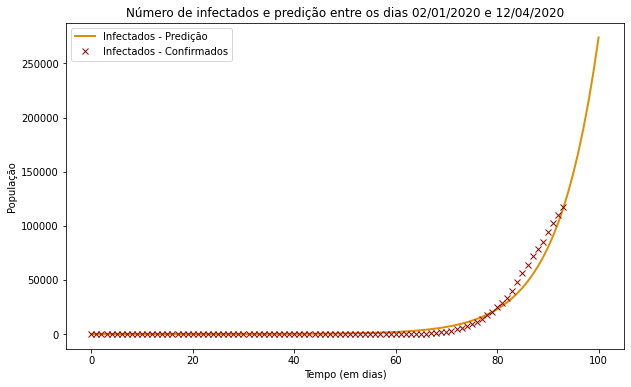

In [9]:
params = Parametros(
    pais= 'Spain',
    μ = 9.213/(1000 * 365), υ = 8.265/(1000 * 365),
    β=103.3/365, γ=1/7., ρ=dataset.mortalidade(dataset.dataset('Spain')),

    P_0 = 46_754_778, Y_0 = 1
)

simulacao = Simulacao(params)

relatorio = simulacao.simular()
relatorio.relatorio()
relatorio.plot()

### I.c Estados Unidos da América

Referência de valores utilizados:
 * Taxa de natalidade utilizada: https://www.macrotrends.net/countries/USA/united-states/birth-rate
 * Taxa de mortalidade utilizada: https://www.macrotrends.net/countries/USA/united-states/death-rate
 * Tamanho da população: https://www.macrotrends.net/countries/USA/united-states/population
 

Como pode ser visto no segundo gráfico, atualmente os Estados Unidos apresentam um comportamento similar ao da Espanha: uma taxa de crescimento exponencial no número de infectados. Entretanto, neste país, a taxa atual de letalidade do COVID-19 é de 2.57%, bem menor que a taxa espanhola. Uma hipótese seria um amplo teste da população. N[este artigo do New York Times](https://www.nytimes.com/interactive/2020/03/26/us/coronavirus-testing-states.html) é possível ver o número absoluto de testes realizados e o proporcional por estado. Nova York, indicado como [o novo epicentro da doença](https://www.nytimes.com/2020/03/22/nyregion/Coronavirus-new-York-epicenter.html), está testando agressivamente.

Medidas de contenção do crescimento de infectados ainda não são visíveis, possivelmente disfarçadas pelo aumento de testes.

 País: United_States_of_America

Parâmetros
-------------------------------
 - υ: Taxa de natalidade: 3.284931506849315e-05
 - μ: Taxa de mortalidade (por mortes naturais): 2.4328767123287675e-05

 - γ: Taxa de recuperação: 0.14285714285714285
   -> 1/γ: Período infeccioso médio: 7.0 dias
 - ρ: Probabilidade de falecimento: 2.57%
 - β: Taxa de transmissão: 0.3178082191780822

Datas
-------------------------------
21/01/2020 - Data de identificação do primeiro infectado
15/05/2020 - Dia de pico de infectados (115º dia de contágio)

População
-------------------------------
População inicial:   331.002.651 habitantes (100%)
População em um ano: 324.831.824 habitantes (98.14%)
 - Diferença na população em um ano: 6.170.827 de habitantes a menos
 - População morta pelo SARS-COV-2 em um ano: 7.279.363 habitantes


Comparação com o cenário atual
-------------------------------
RMSE:  6471.934211266918


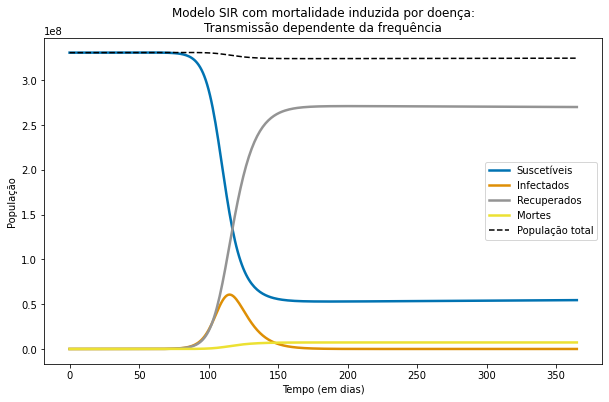

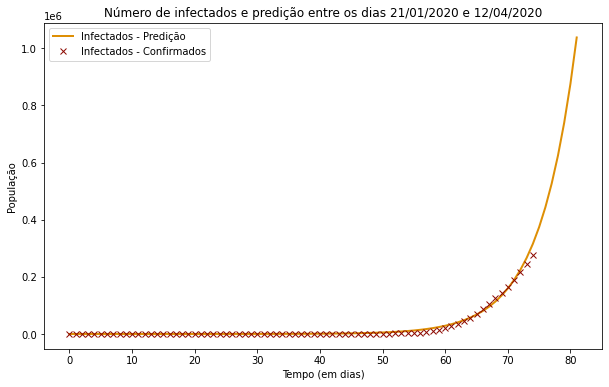

In [10]:
params = Parametros(
    pais= 'United_States_of_America',

    μ = 8.880/(1000 * 365), υ = 11.990/(1000 * 365),
    
    β=116/365, γ=1/7., ρ=dataset.mortalidade(dataset.dataset('United_States_of_America')),
    
    P_0 = 331_002_651,
    Y_0 = 1
)

simulacao = Simulacao(params)

relatorio = simulacao.simular()
relatorio.relatorio()
relatorio.plot()